<a href="https://colab.research.google.com/github/yuji-sgs/Practical-Statistics-for-Data-Scientists/blob/main/Chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データと標本の分布

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [3]:
dir = Path('drive/MyDrive/Colab Notebooks/技術書/データサイエンスのための統計学入門/data')

In [4]:
LOANS_INCOME_CSV = dir / 'loans_income.csv'
SP500_DATA_CSV = dir / 'sp500_data.csv.gz'

## 2-3 統計量の標本分布

In [5]:
loans_income = pd.read_csv(LOANS_INCOME_CSV).squeeze('columns')

sample_data = pd.DataFrame({
    'income':loans_income.sample(1000),
    'type':'Data',
})

sample_mean_05 = pd.DataFrame({
    'income':[loans_income.sample(5).mean() for _ in range(1000)],
    'type':'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income':[loans_income.sample(20).mean() for _ in range(1000)],
    'type':'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
results

,income,type
5461,60000.00,Data
43491,50000.00,Data
39732,77000.00,Data
40827,85000.00,Data
30389,152654.00,Data
...,...,...
995,74036.80,Mean of 20
996,68738.40,Mean of 20
997,83332.00,Mean of 20
998,56784.05,Mean of 20


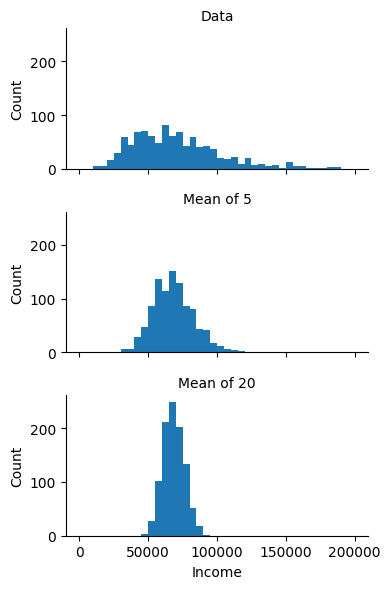

In [6]:
g = sns.FacetGrid(results, col = 'type', col_wrap = 1, height = 2, aspect = 2)
g.map(plt.hist, 'income', range = [0, 200000], bins = 40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

## 2-4 ブートストラップ

In [7]:
results = []
for nrepeat in range(1000):
  sample = resample(loans_income)
  results.append(sample.median())
results = pd.Series(results)
print('Boorstrap Statistics')
print(f'original:{loans_income.median()}')
print(f'bias:{results.mean() - loans_income.median()}')
print(f'std.error:{results.std()}')

Boorstrap Statistics
original:62000.0
bias:-77.31999999999971
std.error:217.65470744202082


## 2-5　信頼区間

68760.51844
55734.1


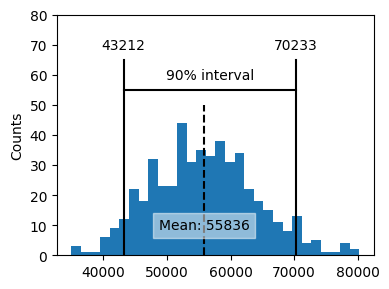

In [8]:
print(loans_income.mean())
np.random.seed(seed = 3)

# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples = 20, replace = False)
print(sample20.mean())
results = []
for n in range(500):
  sample = resample(sample20)
  results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color = 'black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}',
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

## 2-6 正規分布

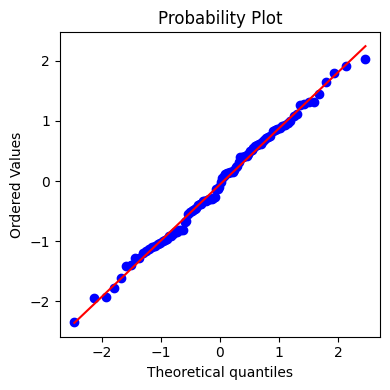

In [16]:
# Q-Qプロット
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

## 2-7 ロングテールの分布

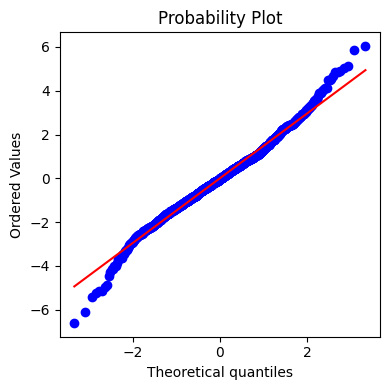

In [17]:
sp500_px = pd.read_csv(SP500_DATA_CSV)

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()